In [1]:
import pandas as pd

# Reading data in the form of csv file

In [2]:
df=pd.read_csv('AAPL.csv')

# Displaying top 5 rows of data frame

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


# Displaying last 5 rows of data frame

In [4]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


# Displaying the data of close feature of data frame


In [5]:
df1=df.reset_index()['close']

In [6]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

# Graph representation of data of close feature of data frame

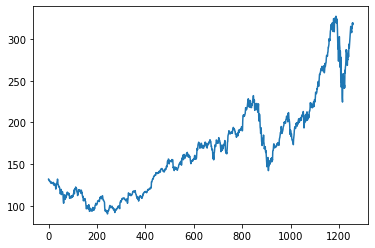

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np

# STEP 1-Data Preprocessing
# STEP 2-Applying minmax scaler
# STEP 3-Transforming close feature values between 0 to 1

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


# Splitting dataset into train and test split

In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

# Displaying size of train and test dataset

In [13]:
print(training_size,test_size)
print(train_data.shape , test_data.shape)


817 441
(817, 1) (441, 1)


In [14]:
train_data[:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

# Converting an array of values into a dataset matrix

In [15]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# Setting timesteps value as 100

In [32]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [33]:
print(X_train.shape)
print(y_train.shape)

(716, 100)
(716,)


In [34]:
print(X_test.shape)
print(ytest.shape)

(340, 100)
(340,)


In [35]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

# Reshape input to be 3-D[samples, time steps, features] which is required for LSTM

In [36]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1 , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1 , 1)

In [37]:
print(X_train.shape)
print(X_test.shape)

(716, 100, 1, 1)
(340, 100, 1, 1)


In [38]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf

In [42]:
#input_shape = (28,28,1)
input_shape = (X_train.shape[1],1,1)
input_layer = Input(input_shape)

layer11 = Conv2D(16,(1,1),activation = tf.nn.relu, input_shape = input_shape)(input_layer)  #op 28*28
layer12 = Conv2D(16,(7,1),activation = tf.nn.relu, input_shape = input_shape)(input_layer)  #op 26*26
layer13 = Conv2D(16,(14,1),activation = tf.nn.relu, input_shape = input_shape)(input_layer)  #op 24*24
layer14 = Conv2D(16,(21,1),activation = tf.nn.relu, input_shape = input_shape)(input_layer)  #op 22*22

layer21 = MaxPool2D((2,1))(layer11)  #14
layer22 = MaxPool2D((2,1))(layer12)  #13
layer23 = MaxPool2D((2,1))(layer13)  #12
layer24 = MaxPool2D((2,1))(layer14)  #11

layer31 = Conv2D(32,(5,1),activation = tf.nn.relu)(layer21) #10
layer32 = Conv2D(32,(3,1),activation = tf.nn.relu)(layer22) #11
layer33 = Conv2D(32,(3,1),activation = tf.nn.relu)(layer23) #10
layer34 = Conv2D(32,(1,1),activation = tf.nn.relu)(layer24) #11

layer41 = MaxPool2D((2,1))(layer31)
layer42 = MaxPool2D((2,1))(layer32)
layer43 = MaxPool2D((2,1))(layer33)
layer44 = MaxPool2D((2,1))(layer34)

flatten51 = Flatten()(layer41)
flatten52 = Flatten()(layer42)
flatten53 = Flatten()(layer43)
flatten54 = Flatten()(layer44)

layer61 = Dense(14,activation = tf.nn.relu)(flatten51)
layer62 = Dense(14,activation = tf.nn.relu)(flatten52)
layer63 = Dense(14,activation = tf.nn.relu)(flatten53)
layer64 = Dense(14,activation = tf.nn.relu)(flatten54)

layer71 = tf.keras.layers.concatenate([layer61 , layer61 , layer63 , layer64],axis=1)

output_layer_internal = Dense(10, activation = tf.nn.relu)(layer71)
output_layer =          Dense(1)(output_layer_internal)

model = Model(input_layer,output_layer)

model.compile(loss=tf.keras.losses.mean_squared_error ,optimizer='Adam', metrics = ['mse'])

# Displaying the model summary

In [44]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 100, 1, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 100, 1, 16)   32          input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 87, 1, 16)    240         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 80, 1, 16)    352         input_6[0][0]                    
_______________________________________________________________________________________

In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 9.7290e-0

Epoch 60/100
12/12 [==============================] - 0s 7ms/step - loss: 1.9046e-04 - mse: 1.9046e-04 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 61/100
12/12 [==============================] - 0s 7ms/step - loss: 1.9612e-04 - mse: 1.9612e-04 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 62/100
12/12 [==============================] - 0s 7ms/step - loss: 1.7864e-04 - mse: 1.7864e-04 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 63/100
12/12 [==============================] - 0s 7ms/step - loss: 1.8133e-04 - mse: 1.8133e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 64/100
12/12 [==============================] - 0s 7ms/step - loss: 2.0013e-04 - mse: 2.0013e-04 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 65/100
12/12 [==============================] - 0s 7ms/step - loss: 2.3513e-04 - mse: 2.3513e-04 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 66/100
12/12 [==============================] - 0s 6ms/step - loss: 1.7912e-04 - mse: 1.7912e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 67/100
12/12 [

In [45]:
import tensorflow as tf

In [46]:
tf.__version__

'2.3.0'

# Predicting and checking performance metrics

In [47]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

# Transforming back train_predict and test_predict to original form

In [48]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Calculating RMSE performance metrics

In [49]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.0142197763571

#  Test Data RMSE

In [50]:
math.sqrt(mean_squared_error(ytest,test_predict))

234.5362463817042

# STEP 1-Plotting 
 # STEP 2-Shifting train predictions for plotting
 # STEP 3-Shifting test predictions for plotting
 # STEP 4-Plotting baseline and predictions
 # Green line shows test data predicted output
 # Oragne line shows train data
 # Blue line shows df1(data of close feature of data frame)

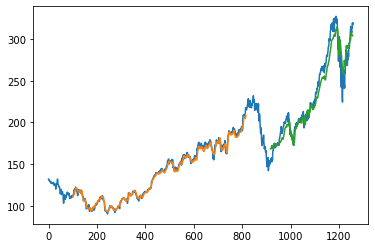

In [51]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [52]:
len(test_data)

441

In [53]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

# Displaying previous 100 days test_data values

In [54]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

# STEP 1-Demonstrating prediction for next 10 days
# STEP2-Printing(temp_input)
# STEP3-Printing(x_input)
# STEP4-Printing(temp_input)

In [55]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.90519065]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

14 day output [[0.92824113]]
15 day input [0.96635143 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106
 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.90519065 0

28 day output [[0.9493501]]
29 day input [1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.90519065
 0.90770453 0.90896839 0.90949798 0.90414256 0.90116638 0.89517379
 0.901923   0.90513164 0.9081794  0.90526867 0.91074127 0.91611874
 0.9199428  0.9282411

# From testdata previous 100 days is taken so the day_new range is given between 1 to 101 
# 30 days future need to be predicted so day_pred range is given between 101 to 131

In [56]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [57]:
import matplotlib.pyplot as plt
len(df1)

1258

# Previous 100 data is needed for future prediction
# Length of df1 is 1258
# 1258-100=1158
# STEP1-Displaying data between 1158 to 1258 as real data
# STEP2-scaler.inverse_transform(lst_output) is the predicted data
# Orange line shows new 30 days output

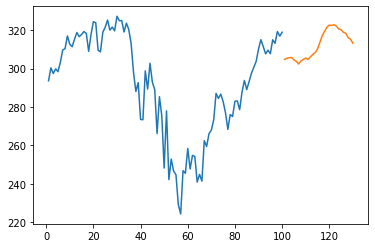

In [58]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

# Combining lst_output and df3

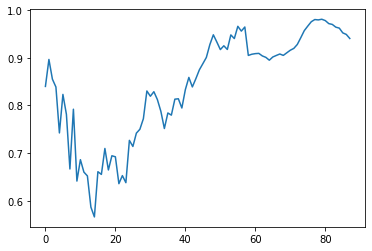

In [59]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

# Transforming back to original form and then into the form of a list

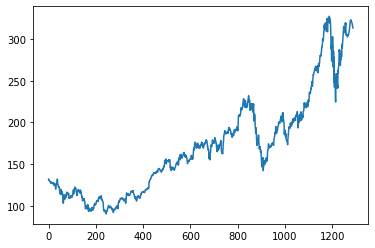

In [60]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)